### 3. Sales Trend

This section analyzes the overall health of the business volume and identify high-demand periods for operational planning. The key analyses performed are:

1. Total and Net Units Sold: Calculation of the Gross Units Sold, Total Returns, and Overall Return Rate (found to be 2.00%)
2. Annual Units Sold Trend: Examining total units sold trend across the years (2022–2024) to assess the stability and growth of the overall business volume
3. Sales Trend by Day of Week: A detailed breakdown of units sold by day of the week, with a specific focus on weekend sales across different regions and categories (e.g., West region weekend sales)

In [2]:
# Import pandas for data manipulation and analysis
import pandas as pd

# Import numpy for numerical operations (though less used here, it's a good practice)
import numpy as np

# Import matplotlib.pyplot for basic plotting
import matplotlib.pyplot as plt

# Import seaborn for enhanced statistical data visualization
import seaborn as sns

# Configure display options for better readability
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
df = pd.read_csv(r"C:\Users\HP\Desktop\Retail\retail_sales_synthetic.csv")

In [4]:
# Convert the 'date' column to datetime objects
df["date"] = pd.to_datetime(df["date"])

# Extract the Year and Month into new columns for easy grouping and analysis
df["Year"] = df["date"].dt.year
df["Month"] = df["date"].dt.month

print("New columns 'Year' and 'Month' created successfully.")
print(df[['date', 'Year', 'Month']].head())

New columns 'Year' and 'Month' created successfully.
        date  Year  Month
0 2024-09-05  2024      9
1 2022-10-24  2022     10
2 2023-04-19  2023      4
3 2024-06-22  2024      6
4 2024-07-20  2024      7


#### 3.1 Total and Net Units Sold

In [5]:
# Total units sold and the final net units sold (total sales minus returns)

# Calculate Total Units Sold (Gross Sales)
total_units_sold = df["units_sold"].sum()
print(f"Total units sold (Gross): {total_units_sold:,}")

# Calculate Total Returns

total_returns = df["returns"].sum()
print(f"Total returns made: {total_returns:,}")

# Calculate the overall return rate
overall_return_rate = total_returns / total_units_sold * 100
print(f"Overall Return Rate: {overall_return_rate:.2f}%")

# Observation:
# Total sales will now be sliced across years, and other demogs)
# Total Return Rate was 2% (which needs deep dive across various cuts)

Total units sold (Gross): 686,148
Total returns made: 13,757
Overall Return Rate: 2.00%


#### 3.2 Annual Units Sold Trend

Total Sales across years (Units Sold): 
Year
2022    229837
2023    228091
2024    228220
Name: units_sold, dtype: int64


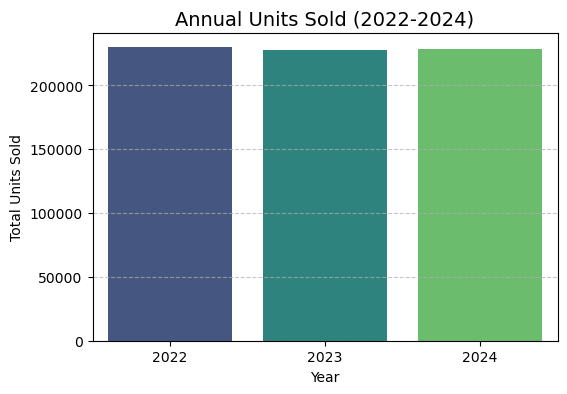

In [6]:
# Group by year and sum the units sold to see the annual trend
annual_sales = df.groupby("Year")["units_sold"].sum()
print("Total Sales across years (Units Sold): ")
print(annual_sales)

# Visualization: Annual Sales Trend
plt.figure(figsize=(6, 4))
sns.barplot(x=annual_sales.index, y=annual_sales.values, palette="viridis")
plt.title('Annual Units Sold (2022-2024)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Total Units Sold')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# Observation: 
# Total sales witnessed a decline from 2022 to 2023, however it remained flat in 2024.

#### 3.3 Sales Performance during Promotion, Timing, and Holiday

In [7]:
# Sales with and without Promotion (promotion: 1=Yes, 0=No)
sales_without_promotion = df[df["promotion"] == 0]["units_sold"].sum()
sales_during_promotion = df[df["promotion"] == 1]["units_sold"].sum()

print(f"\nTotal sales without promotion (Units): {sales_without_promotion:,}")
print(f"Total sales during promotion (Units): {sales_during_promotion:,}")

# Sales by Day Type (weekend: 1=Weekend, 0=Weekday)
sales_weekday = df[df["weekend"] == 0]["units_sold"].sum()
sales_weekend = df[df["weekend"] == 1]["units_sold"].sum()

print(f"\nTotal sales during weekdays (Units): {sales_weekday:,}")
print(f"Total sales during weekends (Units): {sales_weekend:,}")

# Sales during and without Holiday (holidays: 1=Yes, 0=No)
sales_weekday = df[df["is_holiday"] == 0]["units_sold"].sum()
sales_weekend = df[df["is_holiday"] == 1]["units_sold"].sum()

print(f"\nTotal sales without holidays (Units): {sales_weekday:,}")
print(f"Total sales during holidays (Units): {sales_weekend:,}")


# Observation:
# Promotions, and Holidays did not play a major role in contributing to the sales growth
# Weekend sales contributed ~33% in the sales


Total sales without promotion (Units): 599,519
Total sales during promotion (Units): 86,629

Total sales during weekdays (Units): 459,688
Total sales during weekends (Units): 226,460

Total sales without holidays (Units): 674,230
Total sales during holidays (Units): 11,918


#### 3.4 Weekend Sales across the years

In [8]:
# 3.4 Weekend Sales across the years

#Filter data only for weekend
sales_weekend = df[df["weekend"] == 1]

#New data frame, grouping units sold acrosbs years
weekend_sales_years=sales_weekend.groupby("Year")["units_sold"].sum()


print(weekend_sales_years)


#Observation:
#Weekend sales witnessed constant decline from 2022 to 2024 

Year
2022    75786
2023    75492
2024    75182
Name: units_sold, dtype: int64


#### 3.5 Weekend sales analysis across region and year

In [9]:
# Group by region and year to see weekend sales trend
region_weekend = sales_weekend.groupby(["region","Year"])["units_sold"].sum().unstack()
region_weekend = region_weekend.sort_values(by = 2024, ascending = False)

#Add Total to the last
region_weekend.loc["Total"] = region_weekend.sum(axis=0)


print("\n Weekend Sales by Region and Year:")
print(region_weekend)

# Obervation:
# Southern sales surged from 2023 to 2024
# North and West sales declined during weekends 


 Weekend Sales by Region and Year:
Year     2022   2023   2024
region                     
South   23248  22855  23025
East    22229  22371  22324
North   15691  15469  15271
West    14618  14797  14562
Total   75786  75492  75182


#### 3.6 Weekend sales analysis across categories and year (for North)

In [10]:
# Weekend sales analysis for North, across categories for Years

# Filter data only for weekend
sales_weekend = df[df["weekend"] == 1]


# Fitler sales_weekend data frame by North Region
North_weekend = sales_weekend[sales_weekend["region"] == "North" ]

# Group by categories, and Year 
North_weekend_categories = North_weekend.groupby(["category","Year"])["units_sold"].sum().unstack()

# Sort categories by latest year (2024)
North_weekend_categories = North_weekend_categories.sort_values(by = 2024, ascending = False)


# Add Total to the last
North_weekend_categories.loc["Total"] = North_weekend_categories.sum(axis=0) 


print("\n Weekend Sales by Category and Year (for North):")
print(North_weekend_categories)


# Obervation:
# Clothing and Home segments are underperforming on weekends in 2024, from 2023
# Electronics segment was flat in 2024


 Weekend Sales by Category and Year (for North):
Year          2022   2023   2024
category                        
Clothing      5457   5138   5090
Home          4496   4888   4652
Electronics   3162   3130   3194
Beauty        1421   1308   1271
Sports        1155   1005   1064
Total        15691  15469  15271


#### 3.7 Weekend sales analysis across categories and year (for West)

In [11]:
# Weekend sales analysis for West, across categories for Years

# Filter data only for weekend
sales_weekend = df[df["weekend"] == 1]


# Fitler sales_weekend data frame by West Region
West_weekend = sales_weekend[sales_weekend["region"] == "West" ]

# Group by categories, and Year 
West_weekend_categories = West_weekend.groupby(["category","Year"])["units_sold"].sum().unstack()

# Sort categories by latest year (2024)
West_weekend_categories = West_weekend_categories.sort_values(by = 2024, ascending = False)


# Add Total to the last
West_weekend_categories.loc["Total"] = West_weekend_categories.sum(axis=0) 


print("\n Weekend Sales by Category and Year (for West):")
print(West_weekend_categories)


# Obervation:
# Clothing, Home, and Electronics segments are underperforming on weekends in 2024, from 2023 


 Weekend Sales by Category and Year (for West):
Year          2022   2023   2024
category                        
Clothing      4835   4932   4872
Home          4645   4591   4451
Electronics   2864   3123   2981
Beauty        1262   1104   1168
Sports        1012   1047   1090
Total        14618  14797  14562
